In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Q1 a)
data_sunspots = np.loadtxt("sunspots.txt")
data_sunspots

array([[0.000e+00, 5.800e+01],
       [1.000e+00, 6.260e+01],
       [2.000e+00, 7.000e+01],
       ...,
       [3.140e+03, 2.520e+01],
       [3.141e+03, 2.350e+01],
       [3.142e+03, 2.160e+01]])

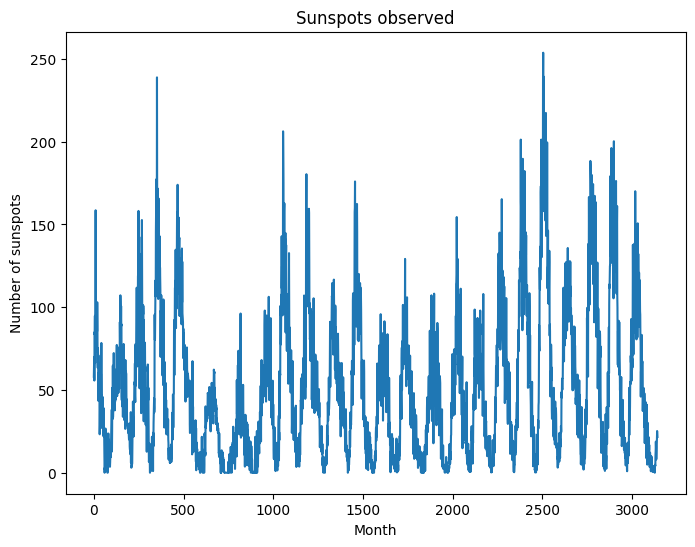

The length of the cycle is approximately 130 months


In [4]:
plt.figure(figsize=(8,6))
plt.plot(data_sunspots[:, 0], data_sunspots[:, 1])
plt.xlabel("Month")
plt.ylabel("Number of sunspots")
plt.title("Sunspots observed")
# plt.legend()
plt.savefig("#_of_sunspots_vs_Month.png")
plt.show()
print("The length of the cycle is approximately", 130, "months")

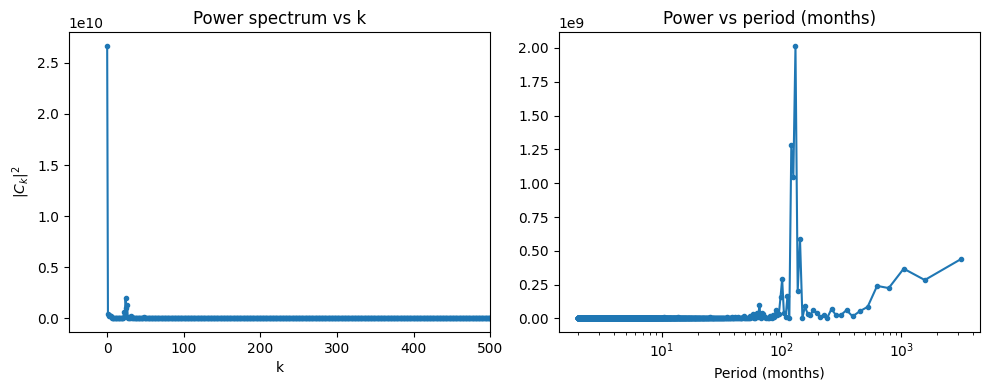

N = 3143 samples
Peak FFT index k = 24
Frequency f_k = 7.636017e-03 cycles/month
Estimated period = 131.0 months = 10.91 years


In [5]:
# Q1 b) and c)
times = data_sunspots[:,0]
x = data_sunspots[:,1]

N = len(x)

C = np.fft.rfft(x)
P = np.abs(C)**2           
k_vals = np.arange(len(P)) 
freqs = np.fft.rfftfreq(N, d=1)   


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(k_vals, P, '.-')
plt.xlim(-50, 500)
plt.xlabel('k')
plt.ylabel(r'$|C_k|^2$')
plt.title('Power spectrum vs k')

plt.subplot(1,2,2)
periods = np.zeros_like(freqs)
nonzero = freqs > 0
periods[nonzero] = 1.0 / freqs[nonzero]
plt.plot(periods[1:], P[1:], '.-') 
plt.xscale('log') 
plt.xlabel('Period (months)')
plt.title('Power vs period (months)')

plt.tight_layout()
plt.savefig('Power_vs_period.png')
plt.show()


search_start = 1
k_peak = np.argmax(P[search_start:]) + search_start
f_peak = freqs[k_peak]            
T_months = 1.0 / f_peak 
T_years = T_months / 12.0

print(f"N = {N} samples")
print(f"Peak FFT index k = {k_peak}")
print(f"Frequency f_k = {f_peak:.6e} cycles/month")
print(f"Estimated period = {T_months:.1f} months = {T_years:.2f} years")

In [6]:
# Q2 a)
data_dow = np.loadtxt("dow.txt")
data_dow

array([12121.71, 12136.44, 12226.73, ..., 11499.25, 11491.91, 11478.13])

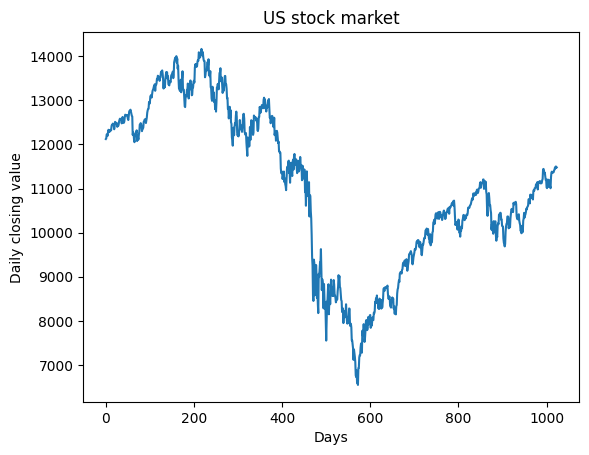

In [7]:
N = len(data_dow)
t = np.arange(N) 
plt.plot(t, data_dow)
plt.title('US stock market')
plt.ylabel('Daily closing value')
plt.xlabel('Days')
plt.savefig('US_stock_market.png')
plt.show()

In [8]:
# Q2 b)
fft_coe = np.fft.rfft(data_dow)
fft_coe

array([ 1.12839039e+07+0.00000000e+00j,  6.84127740e+05-9.55087519e+05j,
       -4.19226205e+05+9.29089562e+04j,  7.41901498e+04-2.73812250e+05j,
       -3.51856811e+04+7.23658613e+04j,  1.11482643e+05-3.14779807e+04j,
        2.16752824e+04-2.45751549e+04j,  1.11224416e+04+2.47975704e+04j,
        3.11884665e+04+2.27868210e+04j,  7.38523102e+03-3.21233427e+04j,
       -3.39615972e+04-1.07833052e+05j, -1.23569569e+04+2.73171276e+04j,
        2.13837315e+04-9.16684147e+04j, -4.32441725e+04+9.92294540e+04j,
       -3.55753518e+03-2.54972743e+04j, -3.04367677e+04-1.72551151e+04j,
       -9.31799610e+03-2.49297658e+04j, -9.35033325e+03-1.75612302e+04j,
        1.17418062e+04+2.09235370e+04j,  4.22549031e+04-2.38143067e+03j,
        1.35294835e+04-3.06720066e+04j,  4.06499470e+03-2.87140744e+04j,
       -1.56146318e+04+2.24811825e+04j,  1.35756353e+04-1.28123867e+04j,
        1.20484888e+04+3.50866363e+03j, -1.55111478e+04-1.70617041e+04j,
        8.98307189e+03+4.49546331e+03j,  4.42970647

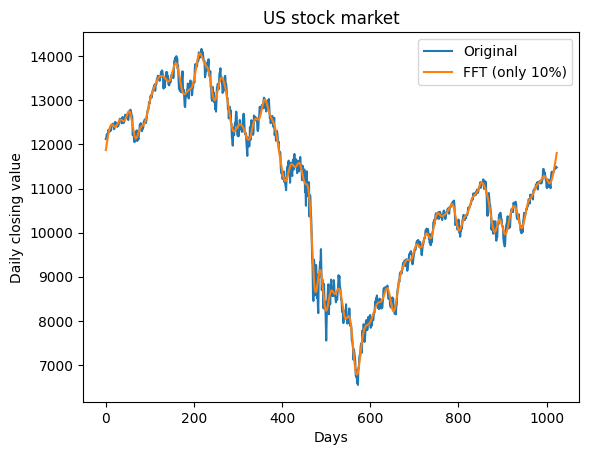

In [9]:
# Q2 c)
filtered_10 = np.copy(fft_coe)
cutoff_10 = int(0.1 * len(filtered_10))
filtered_10[cutoff_10:] = 0
Reverse_fft = np.fft.irfft(filtered_10, n=N)
plt.plot(t, data_dow, label='Original')
plt.plot(t, Reverse_fft, label='FFT (only 10%)')
plt.title('US stock market')
plt.ylabel('Daily closing value')
plt.xlabel('Days')
plt.legend()
plt.savefig('US_stock_market_with_FFT.png')
plt.show()

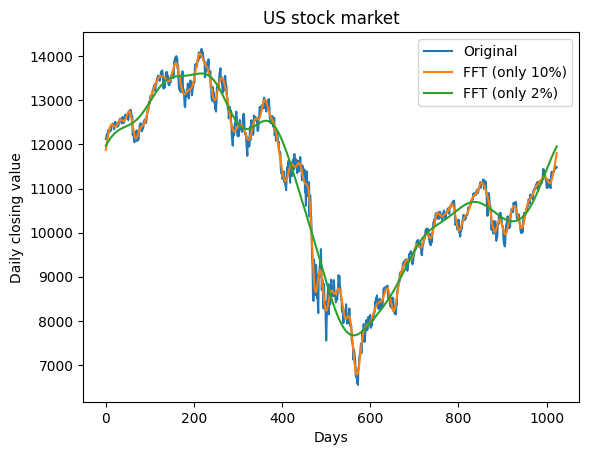

In [11]:
# Q2 d)
filtered_2 = np.copy(fft_coe)
cutoff_2 = int(0.02 * len(filtered_2))
filtered_2[cutoff_2:] = 0
smoothed_2 = np.fft.irfft(filtered_2, n=N)


plt.plot(t, data_dow, label='Original')
plt.plot(t, Reverse_fft, label='FFT (only 10%)')
plt.plot(t, smoothed_2, label='FFT (only 2%)')
plt.title('US stock market')
plt.ylabel('Daily closing value')
plt.xlabel('Days')
plt.legend()
plt.savefig('US_stock_market_with_two_FFT.png')
plt.show()

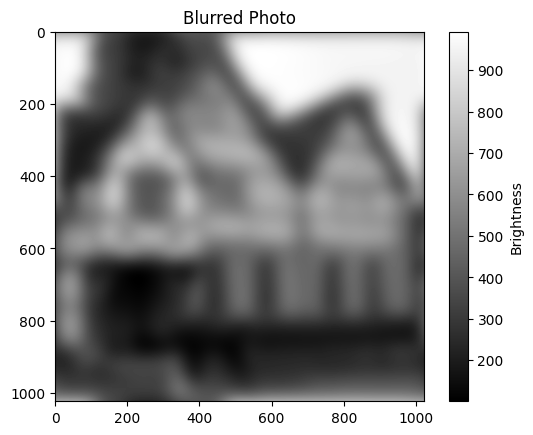

In [14]:
# Q3

data_blur = np.loadtxt("blur.txt")

plt.imshow(data_blur, cmap='gray', origin='upper')
plt.title("Blurred Photo")
plt.colorbar(label='Brightness')
plt.savefig("Blur_picture")
plt.show()

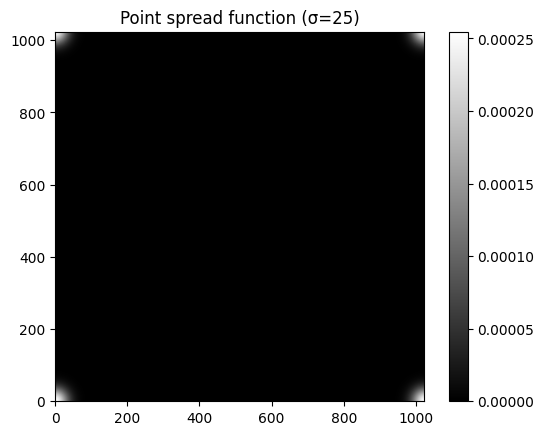

In [28]:
ny, nx = data_blur.shape
sigma = 25.0

x = np.arange(nx)
y = np.arange(ny)
dx = np.minimum(x, nx - x)       
dy = np.minimum(y, ny - y)
DX, DY = np.meshgrid(dx, dy)

f = np.exp(-(DX**2 + DY**2) / (2 * sigma**2))
f /= f.sum()                      

plt.imshow(f, cmap='gray', origin='lower')
plt.title("Point spread function (σ=25)")
plt.colorbar()
plt.savefig("Point spread function")
plt.show()

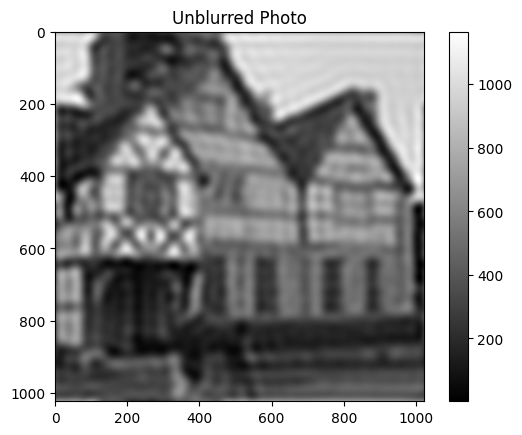

In [27]:
from numpy.fft import rfft2, irfft2

blur_fft = rfft2(data_blur)
f_fft = rfft2(f)

epsilon = 1e-3
f_fft[np.abs(f_fft) < epsilon] = epsilon

unblur_fft = blur_fft / f_fft
unblurred = irfft2(unblur_fft)


plt.imshow(unblurred, cmap='gray', origin='upper')
plt.title("Unblurred Photo")
plt.colorbar()
plt.savefig("unblurred photo")
plt.show()